In [1]:
import sys
sys.path.insert(0, '../airflow/plugins/utils/')

In [2]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [3]:
login = 'trader'
password = 'income'
host = 'localhost'
port = 5432
dbname = 'stocks'
DB_URL = f"user={login} password={password} host={host} port={port} dbname={dbname}"
DB_URL

'user=trader password=income host=localhost port=5432 dbname=stocks'

In [4]:
def _get_db_url(connector: str) -> str:
    return 'user=trader password=income host=localhost port=5432 dbname=stocks'

In [5]:
db._get_db_url = _get_db_url

In [6]:
data = db.get_data_from_table('adsdf', 'aapl')

C:\Users\Samsung\Documents\Courses\algo-trading-python-airflow\tinkoff\notebooks\../airflow/plugins/utils\db.py:44 UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

In [7]:
data.head()

,time,open,high,low,close,volume
0,2022-09-11 04:00:00,157.81,158.44,156.94,156.94,232
1,2022-09-12 04:00:00,158.41,164.26,157.77,163.71,23452293
2,2022-09-13 04:00:00,164.10,164.90,153.38,154.20,31829409
3,2022-09-14 04:00:00,154.71,158.35,153.25,155.80,22053626
4,2022-09-15 04:00:00,155.63,156.00,151.01,151.32,20809555


In [8]:
SMA = 30
DEV = 2

In [9]:
data['sma'] = data['close'].rolling(SMA).mean()
std = data['close'].rolling(SMA).std() * DEV

data['lower'] = data['sma'] - std
data['upper'] = data['sma'] + std

data['distance'] = data['close'] - data['sma']

data['position'] = np.nan
data['position'] = np.where(data['close'] < data['lower'], 1, np.nan)
data['position'] = np.where(data['close'] > data['upper'], -1, data['position'])
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])
data['position'] = data['position'].ffill().fillna(0)

In [10]:
std = data['close'].rolling(SMA).std() * DEV

In [12]:
data['lower'] = data['sma'] - std
data['upper'] = data['sma'] + std

<Axes: title={'center': 'Bollinger Bands with SMA: 30 and 2 std'}>

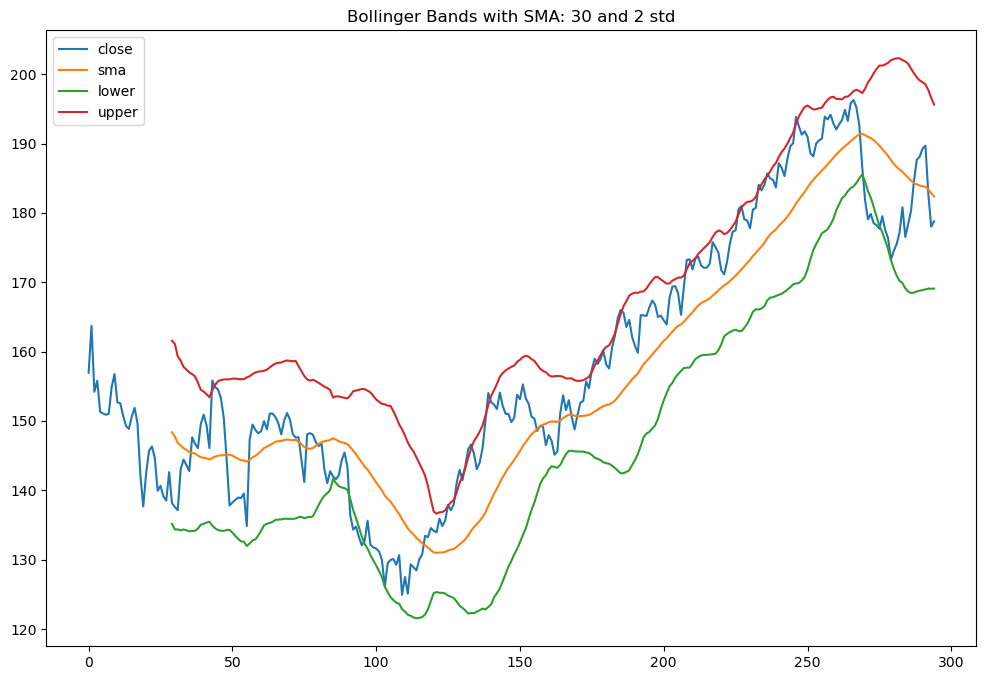

In [14]:
data[['close','sma','lower','upper']] \
    .plot(figsize=(12, 8), title=f'Bollinger Bands with SMA: {SMA} and {DEV} std')

In [21]:
data['distance'] = data['close'] - data['sma']

data['position'] = np.nan
data['position'] = np.where(data['close'] < data['lower'], 1, np.nan)
data['position'] = np.where(data['close'] > data['upper'], -1, data['position'])
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])
data['position'] = data['position'].ffill().fillna(0)

In [22]:
data['position'].value_counts()

-1.0    130
 0.0    122
 1.0     43
Name: position, dtype: int64

In [23]:
data.tail(10)

,time,open,high,low,close,volume,sma,lower,upper,distance,position
285,2023-08-25 04:00:00,176.58,179.14,175.46,178.41,13624519,185.069000,168.641179,201.496821,-6.659000,1.0
286,2023-08-28 04:00:00,178.99,180.59,178.04,180.30,10733032,184.616333,168.446784,200.785883,-4.316333,1.0
287,2023-08-29 04:00:00,180.30,184.90,179.32,184.58,14255045,184.320000,168.499789,200.140211,0.260000,0.0
288,2023-08-30 04:00:00,184.06,187.79,183.53,187.66,13844418,184.103667,168.666827,199.540506,3.556333,0.0
289,2023-08-31 04:00:00,187.89,189.11,186.96,188.10,18671888,183.944667,168.785694,199.103639,4.155333,0.0
290,2023-09-01 04:00:00,188.01,189.92,188.00,189.27,11408808,183.852667,168.864200,198.841133,5.417333,0.0
291,2023-09-05 04:00:00,188.94,189.98,187.09,189.68,12748142,183.749667,168.973810,198.525523,5.930333,0.0
292,2023-09-06 04:00:00,189.20,189.56,181.47,182.75,18322185,183.394667,169.073461,197.715872,-0.644667,0.0
293,2023-09-07 04:00:00,182.14,182.14,173.54,178.00,26229760,182.833000,169.059630,196.606370,-4.833000,0.0
294,2023-09-08 04:00:00,178.50,180.23,177.05,178.77,14234637,182.350000,169.082703,195.617297,-3.580000,0.0
